In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import tensorflow as tf

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


from tensorflow import keras
from tensorflow.keras import layers

In [6]:
dataset = pd.read_csv('lorenz.csv', header=0)
# eliminate all white spaces from the column names
dataset.columns = dataset.columns.str.replace(' ', '')


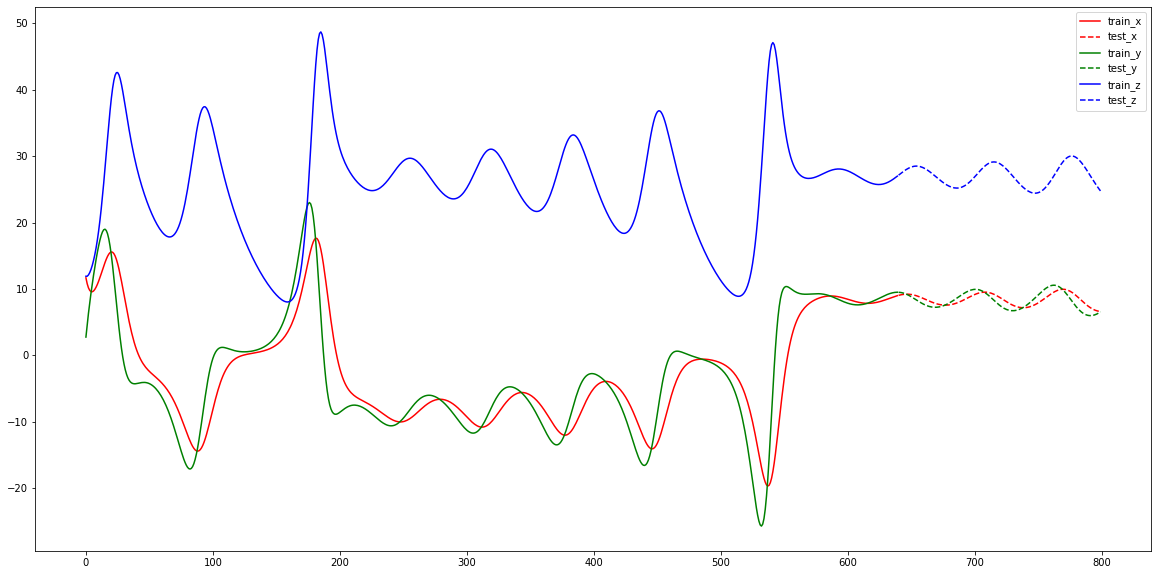

In [7]:
dataset0 = dataset[dataset['particle'] == 0]
# drop column particles for the moment
dataset0 = dataset0.drop(['particle'], axis=1)

## train test split just to plot the data
train_size = int(len(dataset0) * 0.8)
test_size = len(dataset0) - train_size
train, test = dataset0.iloc[0:train_size,:], dataset0.iloc[train_size:len(dataset),:]

## plot to undertsand the data split
plt.figure(figsize=(20, 10))

plt.plot(train['x'], label='train_x', color='red')
plt.plot(test['x'], label='test_x', linestyle='--', color='red')
plt.plot(train['y'], label='train_y', color='green')
plt.plot(test['y'], label='test_y', linestyle='--', color='green')
plt.plot(train['z'], label='train_z', color='blue')
plt.plot(test['z'], label='test_z', linestyle='--', color='blue')

plt.legend()
plt.show()

In [9]:

# separate into X dataset and Y dataset, for now as dataframes
X = dataset0['t']
Y = dataset0.drop(['t'], axis=1)

# scale the columns of the X and Y datasets
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X.values.reshape(-1, 1))
Y = scaler.fit_transform(Y)

Y.shape

(800, 3)

In [10]:
train_size = int(len(dataset0) * 0.8)
test_size = len(dataset0) - train_size

X_train, X_test = X[0:train_size,:], X[train_size:len(dataset0),:]
Y_train, Y_test = Y[0:train_size,:], Y[train_size:len(dataset0),:]

In [55]:
def build_and_compile_model():
  model = keras.Sequential([
      layers.Dense(64, activation='relu'),
      layers.Dense(32, activation='relu'),
      layers.Dense(3)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [56]:
# DNN model
dnn_model = build_and_compile_model()

In [57]:
history = dnn_model.fit(
    X_train,
    Y_train,
    validation_split=0.2,
    verbose=0, epochs=200)

In [58]:
def plot_loss(history, normalize=False):
  history_loss = history.history['loss']
  history_val_loss = history.history['val_loss']
  if normalize:
    history_loss = history.history['loss']/np.mean(X_train)
    history_val_loss = history.history['val_loss']/np.mean(X_train)

  
  plt.plot(history_loss, label='loss')
  plt.plot(history_val_loss, label='val_loss')
  #plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

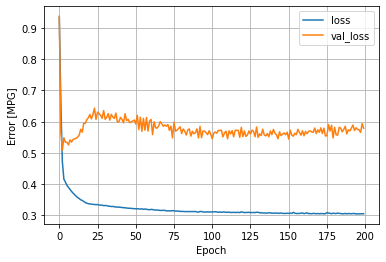

In [59]:

plot_loss(history, normalize=True)


5/5 [==============================] - 0s 583us/step


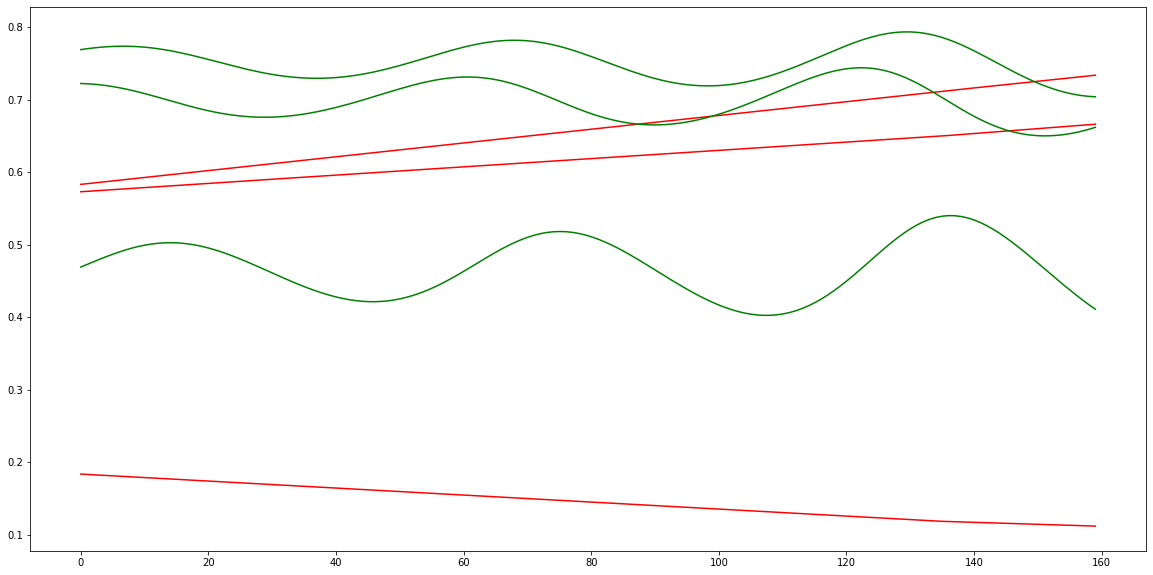

In [63]:
## now test the model

# plot train and test data
plt.figure(figsize=(20, 10))



test_predictions = dnn_model.predict(X_test)

plt.plot(test_predictions, label='test_predictions', color='red')
plt.plot(Y_test, label='Y_test' , color='green')



In [ ]:
# plot the predicted and true values for the x, y and z coordinates in the 3d plot
